In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("netflix_customer_churn.csv")


In [3]:
#TASK 1

#Display the first 5 rows of the dataset.
df.head()

,customer_id,age,gender,subscription_type,watch_hours,last_login_days,region,device,monthly_fee,churned,payment_method,number_of_profiles,avg_watch_time_per_day,favorite_genre
0,a9b75100-82a8-427a-a208-72f24052884a,51,Other,Basic,14.73,29,Africa,TV,8.99,1,Gift Card,1,0.49,Action
1,49a5dfd9-7e69-4022-a6ad-0a1b9767fb5b,47,Other,Standard,0.70,19,Europe,Mobile,13.99,1,Gift Card,5,0.03,Sci-Fi
2,4d71f6ce-fca9-4ff7-8afa-197ac24de14b,27,Female,Standard,16.32,10,Asia,TV,13.99,0,Crypto,2,1.48,Drama
3,d3c72c38-631b-4f9e-8a0e-de103cad1a7d,53,Other,Premium,4.51,12,Oceania,TV,17.99,1,Crypto,2,0.35,Horror
4,4e265c34-103a-4dbb-9553-76c9aa47e946,56,Other,Standard,1.89,13,Africa,Mobile,13.99,1,Crypto,2,0.13,Action


In [6]:
#Check for missing/null values in the dataset.
df.isnull().sum()


customer_id               0
age                       0
gender                    0
subscription_type         0
watch_hours               0
last_login_days           0
region                    0
device                    0
monthly_fee               0
churned                   0
payment_method            0
number_of_profiles        0
avg_watch_time_per_day    0
favorite_genre            0
dtype: int64

In [7]:
#Check for unique values in columns like gender, subscription_type, region, etc.
categorical_cols = ['gender', 'subscription_type', 'region', 'device', 'payment_method', 'favorite_genre']
for col in categorical_cols:
    print(f"{col}: {df[col].nunique()} unique values\n{df[col].unique()}\n")


gender: 3 unique values
['Other' 'Female' 'Male']

subscription_type: 3 unique values
['Basic' 'Standard' 'Premium']

region: 6 unique values
['Africa' 'Europe' 'Asia' 'Oceania' 'South America' 'North America']

device: 5 unique values
['TV' 'Mobile' 'Laptop' 'Desktop' 'Tablet']

payment_method: 5 unique values
['Gift Card' 'Crypto' 'Debit Card' 'PayPal' 'Credit Card']

favorite_genre: 7 unique values
['Action' 'Sci-Fi' 'Drama' 'Horror' 'Romance' 'Comedy' 'Documentary']



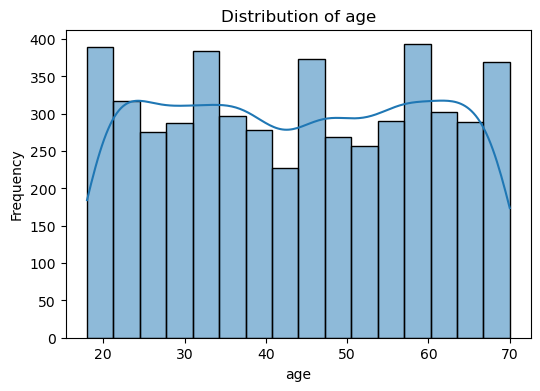

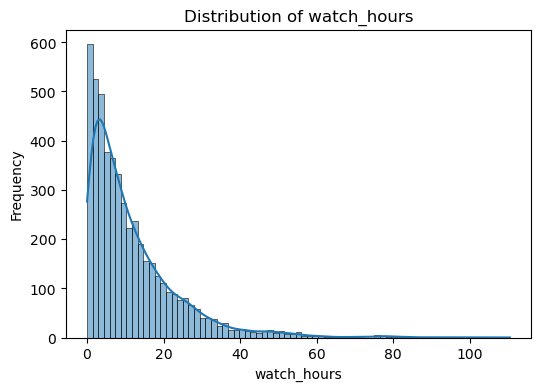

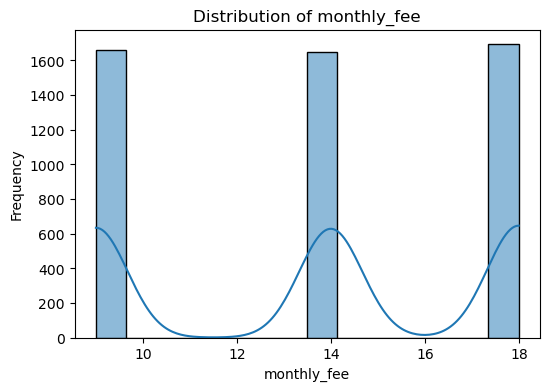

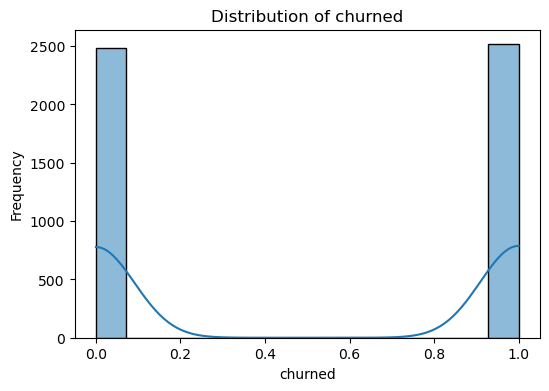

In [8]:
#TASK 2

#Plot the distribution of:
numerical_cols = ['age', 'watch_hours', 'monthly_fee', 'churned']
for col in numerical_cols:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()


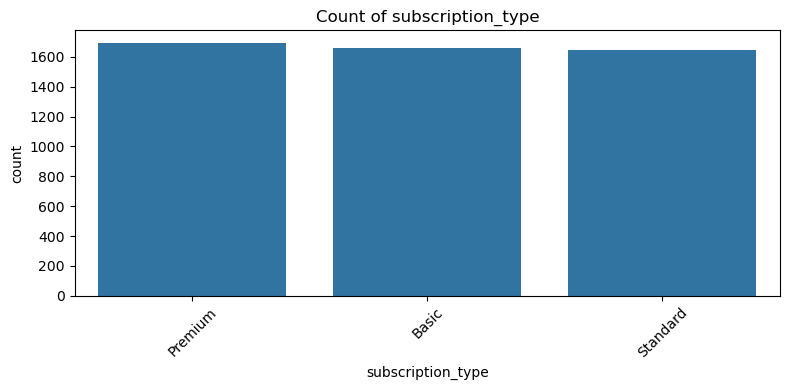

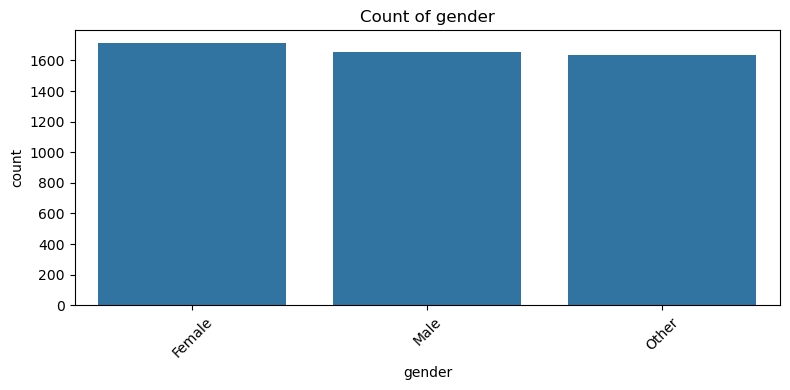

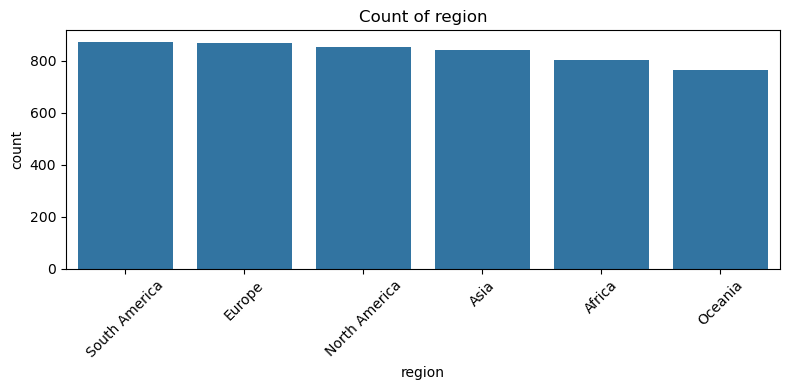

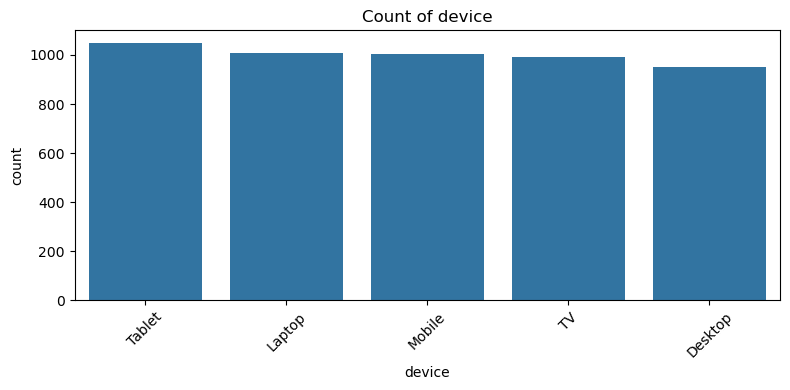

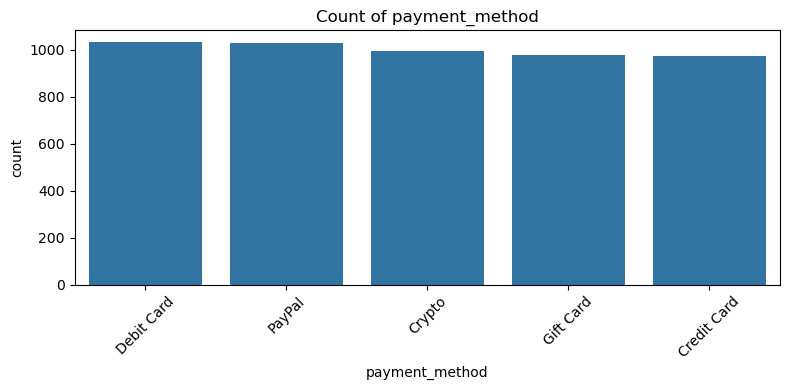

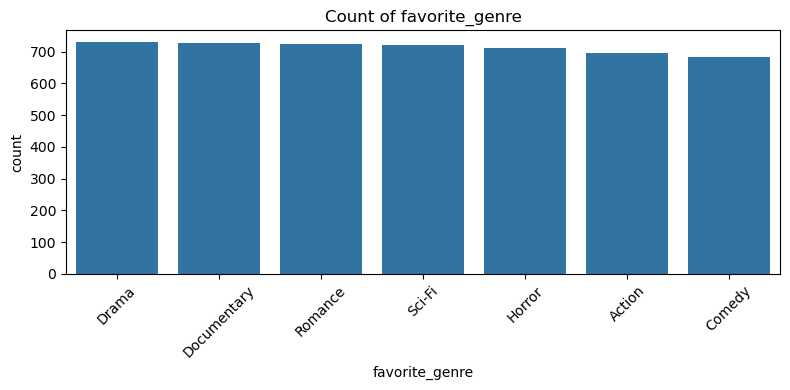

In [9]:
#Count plots for categorical variables:

cat_vars = ['subscription_type', 'gender', 'region', 'device', 'payment_method', 'favorite_genre']
for col in cat_vars:
    plt.figure(figsize=(8, 4))
    sns.countplot(data=df, x=col, order=df[col].value_counts().index)
    plt.title(f'Count of {col}')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


<Figure size 1000x400 with 0 Axes>

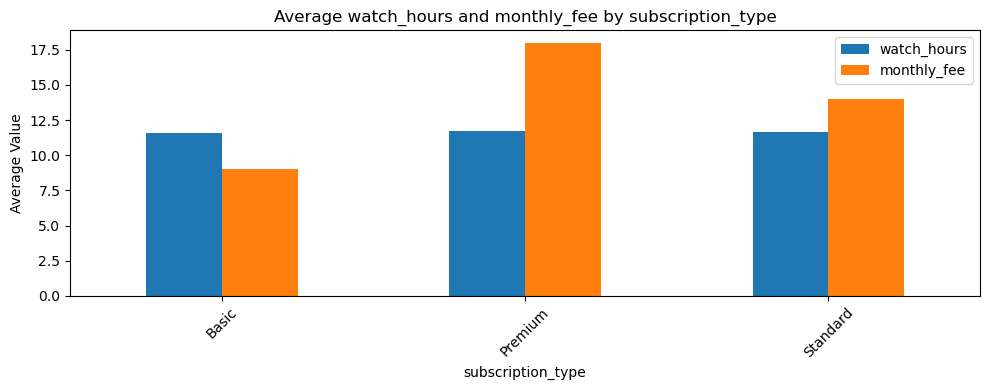

<Figure size 1000x400 with 0 Axes>

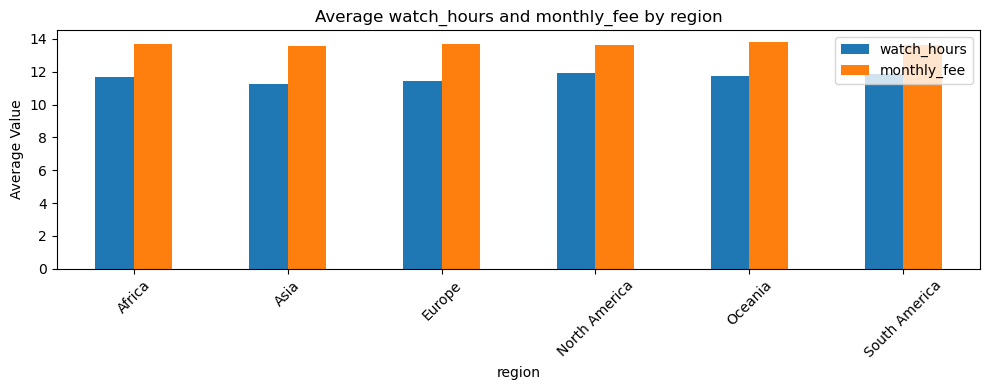

<Figure size 1000x400 with 0 Axes>

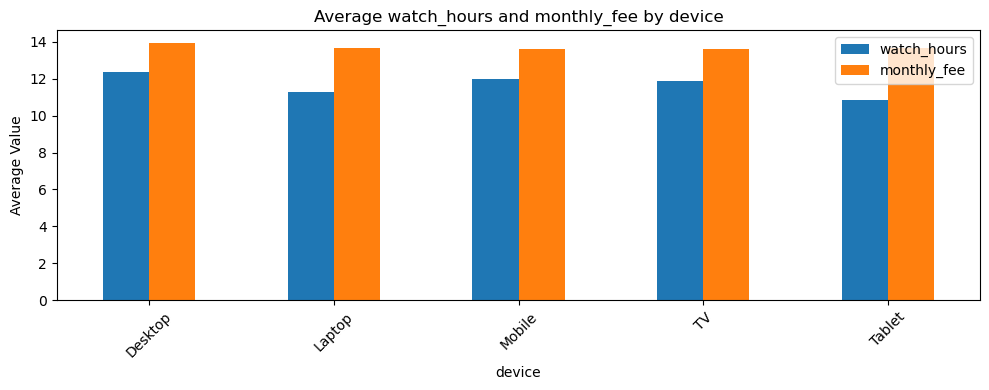

In [10]:
#TASK 3

#Compare average watch_hours and monthly_fee across:
group_cols = ['subscription_type', 'region', 'device']
for col in group_cols:
    plt.figure(figsize=(10, 4))
    df.groupby(col)[['watch_hours', 'monthly_fee']].mean().plot(kind='bar', figsize=(10, 4))
    plt.title(f'Average watch_hours and monthly_fee by {col}')
    plt.ylabel('Average Value')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


/var/folders/bh/28ht3plj4ygd_p5vlqdgdrr40000gn/T/ipykernel_59840/634837674.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='favorite_genre', y='avg_watch_time_per_day', ci=None, order=df['favorite_genre'].value_counts().index)


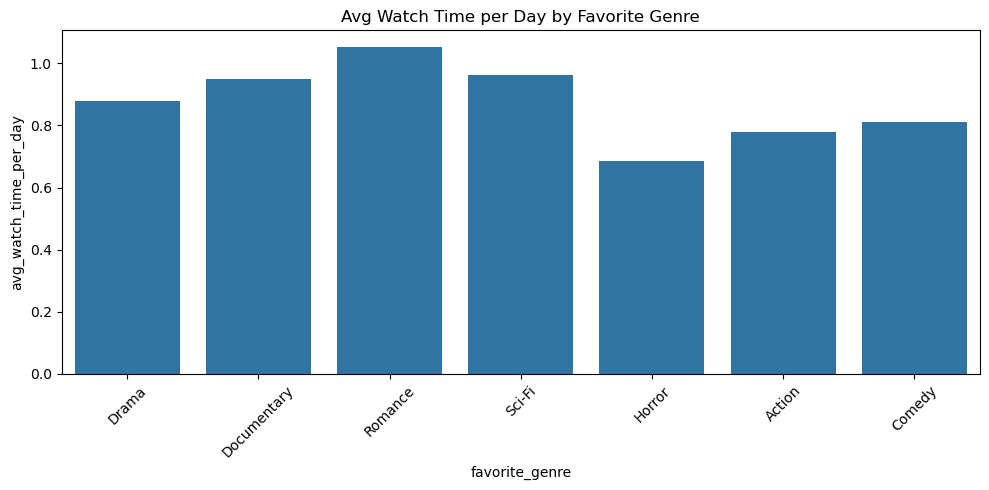

In [11]:
#Plot average avg_watch_time_per_day by favorite_genre.

plt.figure(figsize=(10, 5))
sns.barplot(data=df, x='favorite_genre', y='avg_watch_time_per_day', ci=None, order=df['favorite_genre'].value_counts().index)
plt.title("Avg Watch Time per Day by Favorite Genre")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


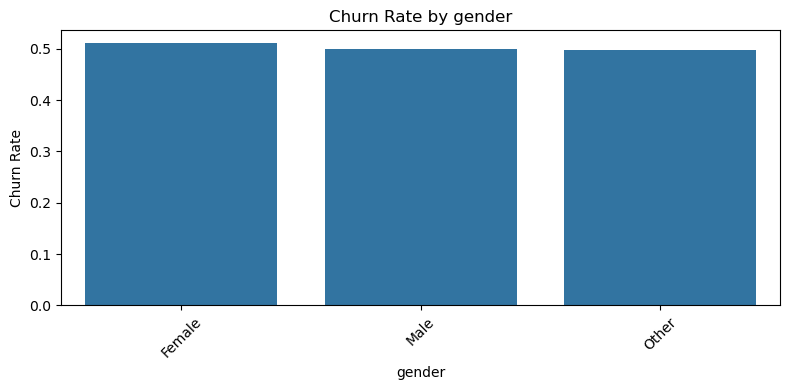

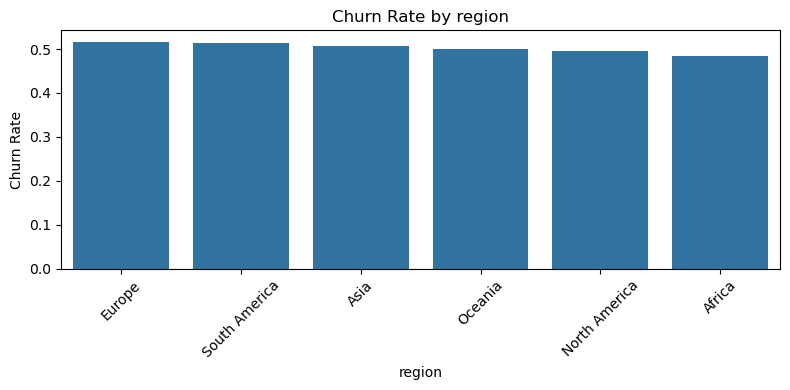

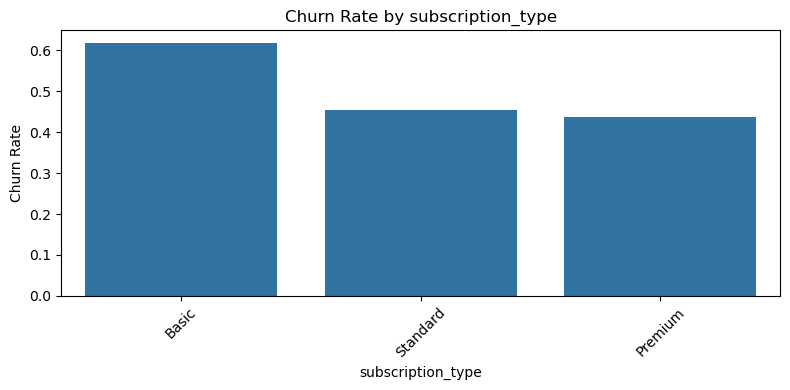

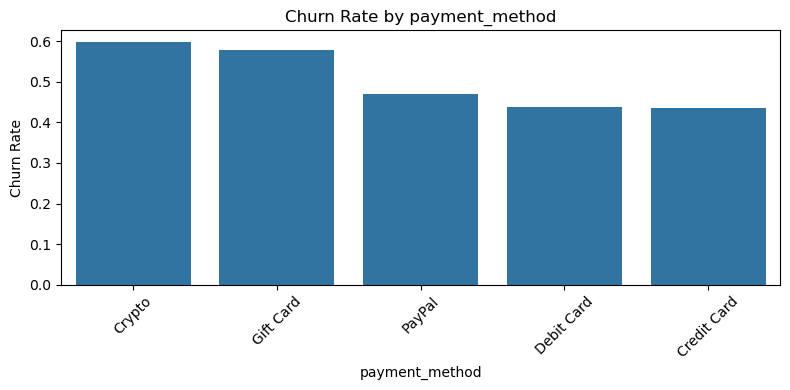

In [12]:
#Analyze churn rate based on:

churn_factors = ['gender', 'region', 'subscription_type', 'payment_method']

for col in churn_factors:
    churn_rate = df.groupby(col)['churned'].mean().sort_values(ascending=False)
    plt.figure(figsize=(8, 4))
    sns.barplot(x=churn_rate.index, y=churn_rate.values)
    plt.title(f'Churn Rate by {col}')
    plt.ylabel('Churn Rate')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


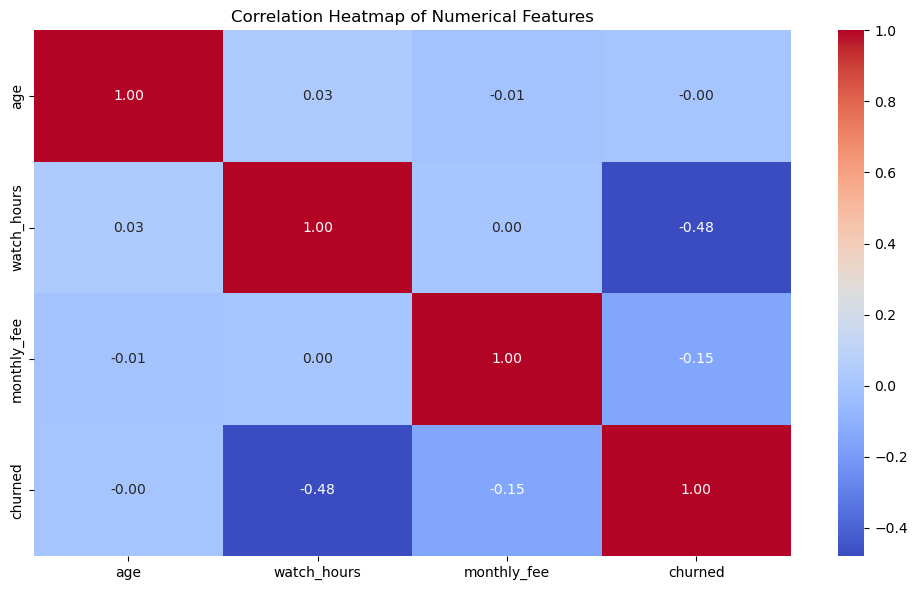

In [13]:
#TASK 4

# Correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df[numerical_cols].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap of Numerical Features")
plt.tight_layout()
plt.show()

# Select only numerical columns
numerical_cols = ['age', 'watch_hours', 'last_login_days', 'monthly_fee', 'number_of_profiles', 'avg_watch_time_per_day', 'churned']


In [ ]:
#TASK 5

# You can print or write these manually in a Markdown cell or in comments:
insights = [
    "1. Customers with lower watch hours tend to churn more often.",
    "2. Basic subscription users have higher churn rate compared to Premium users.",
    "3. Region X shows the highest average watch hours, suggesting stronger engagement.",
    "4. Mobile users have higher churn rate than Smart TV users.",
    "5. Customers who haven't logged in recently (high last_login_days) tend to churn.",
    "6. Certain favorite genres (e.g., Drama, Comedy) correlate with higher avg watch time.",
    "7. Monthly fee shows weak correlation with churn — price may not be the main churn driver."
]

for line in insights:
    print(line)
